<a href="https://colab.research.google.com/github/sznajdr/bcode/blob/main/0dds_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title JSON + match_ids
import os
import requests
import json
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Create text widget for season id input
season_id_widget = widgets.Text(description='Season ID:', layout={'width': '500px'})
season_id_widget.placeholder = '95863'
json_file_name_widget = widgets.Text(description='JSON File Name:', layout={'width': '500px'})
json_file_name_widget.placeholder = 'Malta_PL_22_23'

# Display the text widgets
display(season_id_widget)
display(json_file_name_widget)

# Function to handle button click event
def on_button_click(button):
    # Retrieve user input from text widgets
    
    # Set default URL using the season id input
    url = f"REDACTED/{season_id_widget.value}/1"
    json_file_name = json_file_name_widget.value + ".json"  # Add ".json" extension
    
    # Send GET request and save response
    response = requests.get(url)
    
    # Check if request was successful (Status code 200)
    if response.status_code == 200:
        # Load JSON data from response
        json_data = response.json()
        
        # Create folder with the JSON file name
        folder_name = json_file_name.split(".")[0]
        os.makedirs(folder_name, exist_ok=True)
        
        # Save JSON data to file
        with open(os.path.join(folder_name, json_file_name), "w") as file:
            json.dump(json_data, file)
        print("File successfully saved as '{}'".format(json_file_name))
       
        # Extract relevant data from JSON
        matches = json_data['doc'][0]['data']['matches']
        match_data = []
        for match in matches:
            match_id = match['_id']
            comment = match['comment']
            home_team = match['teams']['home']['mediumname']
            away_team = match['teams']['away']['mediumname']
            #round_name = match['round']['week']
            date = match['time']['date']
            match_data.append([match_id, home_team, away_team, date, comment])

        # Create dataframe
        df = pd.DataFrame(match_data, columns=['match_id', 'home_team', 'away_team', 'date', 'comment'])

        # Name the dataframe based on the JSON file name
        df_name = "match_ids_" + json_file_name.split(".")[0]

        # Set the dataframe name
        globals()[df_name] = df

        # Print the dataframe
        print("Dataframe name: {}".format(df_name))

       
        # Save the dataframe to a CSV file
        csv_file_name = df_name + ".csv"  # Add ".csv" extension
        df.to_csv(os.path.join(folder_name, csv_file_name), index=False)
        print("Dataframe successfully saved as '{}'".format(csv_file_name))
    else:
        print("Error: Failed to retrieve data. Status code:", response.status_code)
        # Specify the folder path where the JSON files are located
    folder_path = '/content/Handball_DE1_22_23/'



# Create button widget
button = widgets.Button(description='Extract Match IDs')

# Add button click event handler
button.on_click(on_button_click)

# Display the button widget
display(button)



Text(value='', description='Season ID:', layout=Layout(width='500px'), placeholder='95863')

Text(value='', description='JSON File Name:', layout=Layout(width='500px'), placeholder='Malta_PL_22_23')

Button(description='Extract Match IDs', style=ButtonStyle())

File successfully saved as 'LNH.json'
Dataframe name: match_ids_LNH
Dataframe successfully saved as 'match_ids_LNH.csv'


In [ ]:
#@title JSON dload
import json
import os
import pandas as pd
import requests
from google.colab import files
from ipywidgets import widgets
from IPython.display import clear_output


# Get the value of the json_file_name_widget variable
folder_name = json_file_name_widget.value

# Create the folder path by concatenating the folder name with the content directory path
folder_path = f"/content/{folder_name}/"

def download_json(match_id, folder_path, file_type):
    """Downloads JSON file for a given match ID and file type."""
    url = f"REDACTED/{file_type}/{match_id}"
    response = requests.get(url)
    if response.status_code == 200:
        json_data = response.json()
        folder_type_path = os.path.join(folder_path, file_type)
        if not os.path.exists(folder_type_path):
            os.makedirs(folder_type_path)
        filename = os.path.join(folder_type_path, f"{match_id}.json")
        with open(filename, 'w') as f:
            json.dump(json_data, f, indent=4)
        print(f"Downloaded and saved {filename}")
    else:
        print(f"Failed to download match ID: {match_id}")

def on_button_click(b):
    # Load the dataframe with match IDs
    #/content/Baseball_BL_22_23/match_ids_Baseball_BL_22_23.csv
    match_ids_df = pd.read_csv(f"/content/{folder_name}/match_ids_{folder_name}.csv")

    # Extract match IDs from the dataframe
    match_ids = match_ids_df['match_id']

    # Get the selected file type from the dropdown widget
    file_type = file_type_dropdown.value

    # Iterate over match IDs and download JSON files
    for match_id in match_ids:
        download_json(match_id, folder_path, file_type)

    # Clear the output
    clear_output()

    # Print a message indicating that the script has finished
    print("Download of JSON files completed!")


# Create a widget to display the selected folder path
folder_widget = widgets.Label(value=folder_path, layout={'width': '500px'})
display(folder_widget)

# Create a dropdown widget to select the file type
file_type_dropdown = widgets.Dropdown(options=["match_odds", "match_details", "match_phrases", "match_timeline", "match_info"],
                                     description="File Type:")
display(file_type_dropdown)

# Create the download button and attach the event handler
button = widgets.Button(description="Download JSON files")
display(button)
button.on_click(on_button_click)



Download of JSON files completed!


# 3way odds

In [ ]:
#@title 3way_odds
import json
import os
import csv

folder_name = json_file_name_widget.value
folder_path = f"/content/{folder_name}/match_odds"


# Create a CSV file to write the extracted data
csv_file = open(f"/content/{folder_name}/{folder_name}_match_odds.csv", 'w', newline='')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['match_id', 'bookmaker_name', 'home_odds', 'draw_odds', 'away_odds', 'home_odds_change', 'draw_odds_change', 'away_odds_change'])

# Iterate over each JSON file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as json_file:
            try:
                json_data = json.load(json_file)

                # Check if 'doc' key is present in the JSON data
                if 'doc' in json_data:
                    doc = json_data['doc']

                    # Check if 'data' key is present in the 'doc' data
                    if doc and 'data' in doc[0]:
                        data = doc[0]['data']

                        # Check if '3way' key is present in the 'data'
                        if data and '3way' in data:
                            way3 = data['3way']

                            # Check if 'odds' key is present in the '3way'
                            if way3 and 'odds' in way3:
                                odds_list = way3['odds']

                                # Extract the required information from the JSON
                                for odds in odds_list:
                                    match_id = odds['_mid']
                                    bookmaker_name = odds['bookmaker']['name']
                                    home_odds = odds['home']['odds']
                                    draw_odds = odds['draw']['odds']
                                    away_odds = odds['away']['odds']
                                    home_odds_change = odds['home']['change'] if 'change' in odds['home'] else None
                                    draw_odds_change = odds['draw']['change'] if 'change' in odds['draw'] else None
                                    away_odds_change = odds['away']['change'] if 'change' in odds['away'] else None

                                    # Write the extracted data to the CSV file
                                    csv_writer.writerow([match_id, bookmaker_name, home_odds, draw_odds, away_odds, home_odds_change, draw_odds_change, away_odds_change])
                                       

        

            except Exception as e:
                print(f"Error processing file '{filename}': {e}")
                continue  # Move on to the next file if error occurs

# Close the CSV file
csv_file.close()

# Load the CSV files into dataframes
match_df_path = f'/content/{folder_name}/match_ids_{folder_name}.csv' 
odds_df_path = f'/content/{folder_name}/{folder_name}_match_odds.csv'               
match_df = pd.read_csv(match_df_path)# Merge the dataframes based on the 'match_id' column
odds_df = pd.read_csv(odds_df_path).fillna(0.00)
merged_df = pd.merge(odds_df, match_df, on='match_id', how='inner')
merged_df.sort_values(by=['date', 'home_team'], inplace=True)

merged_df = pd.merge(odds_df, match_df, on='match_id', how='inner')
# Sort the merged dataframe by 'round_name' and 'date' columns
merged_df.sort_values(by=['match_id', 'date'], inplace=True)
rearranged_df = merged_df[['match_id', 'date', 'home_team', 'away_team', 'bookmaker_name', 'home_odds',
'draw_odds', 'away_odds', 'home_odds_change', 'draw_odds_change', 'away_odds_change', 'comment']]
# Save the sorted merged dataframe to a new CSV file

# Convert the 'date' column to datetime format
rearranged_df['date'] = pd.to_datetime(rearranged_df['date'], format='%d/%m/%y')

# Sort the DataFrame by the 'date' column in ascending order

rearranged_df = rearranged_df.sort_values('date')

rearranged_df.to_csv(f'/content/{folder_name}_odds.csv', index=False)

print("CSV files have been created successfully!")


CSV files have been created successfully!


In [ ]:
#@title scores
import pandas as pd
import json

# Read in the JSON file
with open('/content/LNH/LNH.json') as f:
    json_data = json.load(f)

# Extract the matches data from the JSON file
matches = json_data['doc'][0]['data']['matches']

# Create an empty list to store the data
data = []

# Loop through each match and extract the required data
for match in matches:
    match_id = match['_id']
    date = match['time']['date']
    score_home = match['result']['home']
    score_away = match['result']['away']
    
    # Check if periods key exists in the match dictionary
    if 'periods' in match and match['periods'] is not None and 'p1' in match['periods'] and match['periods']['p1'] is not None:
        score_home_period1 = match['periods']['p1']['home']
        score_away_period1 = match['periods']['p1']['away']
    else:
        score_home_period1 = None
        score_away_period1 = None
    
    # Append the data to the list
    data.append([match_id, date, score_home, score_away, score_home_period1, score_away_period1])

# Create a pandas dataframe from the data
dfhf = pd.DataFrame(data, columns=['match_id', 'date', 'score_home', 'score_away', 'score_home_period1', 'score_away_period1'])
print(dfhf)

     match_id      date  score_home  score_away  score_home_period1  \
0    35016101  09/09/22        30.0        21.0                16.0   
1    35016109  09/09/22        34.0        27.0                18.0   
2    35016113  09/09/22        23.0        27.0                14.0   
3    35016115  09/09/22        28.0        29.0                11.0   
4    35016105  10/09/22        39.0        31.0                19.0   
..        ...       ...         ...         ...                 ...   
228  35016555  02/06/23         NaN         NaN                 NaN   
229  35016557  02/06/23         NaN         NaN                 NaN   
230  35016559  02/06/23         NaN         NaN                 NaN   
231  35016563  02/06/23         NaN         NaN                 NaN   
232  35016565  02/06/23         NaN         NaN                 NaN   

     score_away_period1  
0                   8.0  
1                  14.0  
2                  13.0  
3                  13.0  
4                

In [ ]:
dfhf[dfhf['score_home_period1'] == dfhf['score_away_period1']]

,match_id,date,score_home,score_away,score_home_period1,score_away_period1
12,35016127,16/09/22,32.0,36.0,15.0,15.0
26,35016153,30/09/22,34.0,37.0,18.0,18.0
28,35016163,30/09/22,38.0,32.0,15.0,15.0
29,35016149,01/10/22,35.0,26.0,16.0,16.0
40,35016193,20/10/22,31.0,32.0,15.0,15.0
43,35016187,21/10/22,37.0,34.0,21.0,21.0
45,35016195,21/10/22,30.0,34.0,18.0,18.0
55,35016209,30/10/22,35.0,31.0,18.0,18.0
80,35016265,25/11/22,31.0,33.0,15.0,15.0
85,35016267,26/11/22,32.0,31.0,18.0,18.0


Dropdown(description='Select Team:', options=('HBC Nantes', 'Chambery Savoie', 'US Ivry Handball', 'Cesson Ren…

,date,home_team,away_team,bookmaker_name,home_odds,draw_odds,away_odds
97,2022-09-11,USAM Nimes Gard,Paris Saint-Germain,BetClic,4.5 (0.25),11.5 (0.5),1.3 (-0.02)
98,2022-09-11,USAM Nimes Gard,Paris Saint-Germain,Coral,4.0 (0.1),11.0,1.33
99,2022-09-11,USAM Nimes Gard,Paris Saint-Germain,bwin,4.1 (0.1),12.5,1.34 (-0.01)
100,2022-09-11,USAM Nimes Gard,Paris Saint-Germain,Bet365,4.5 (-0.5),9.5 (-0.5),1.37 (0.05)
101,2022-09-11,USAM Nimes Gard,Paris Saint-Germain,188Bet,4.15 (0.1),11.5 (0.5),1.34 (-0.02)
...,...,...,...,...,...,...,...
2685,2023-04-23,Paris Saint-Germain,Montpellier Handball,Betsson,1.38 (-0.03),9.18,3.63 (0.19)
2686,2023-04-23,Paris Saint-Germain,Montpellier Handball,BetClic,1.4 (-0.02),9.5 (-0.5),3.5 (-0.1)
2687,2023-04-23,Paris Saint-Germain,Montpellier Handball,ComeOn,1.43 (-0.02),8.75,3.6 (0.15)
2688,2023-04-23,Paris Saint-Germain,Montpellier Handball,Kambi2,1.42 (0.04),9.5,3.8 (-0.3)


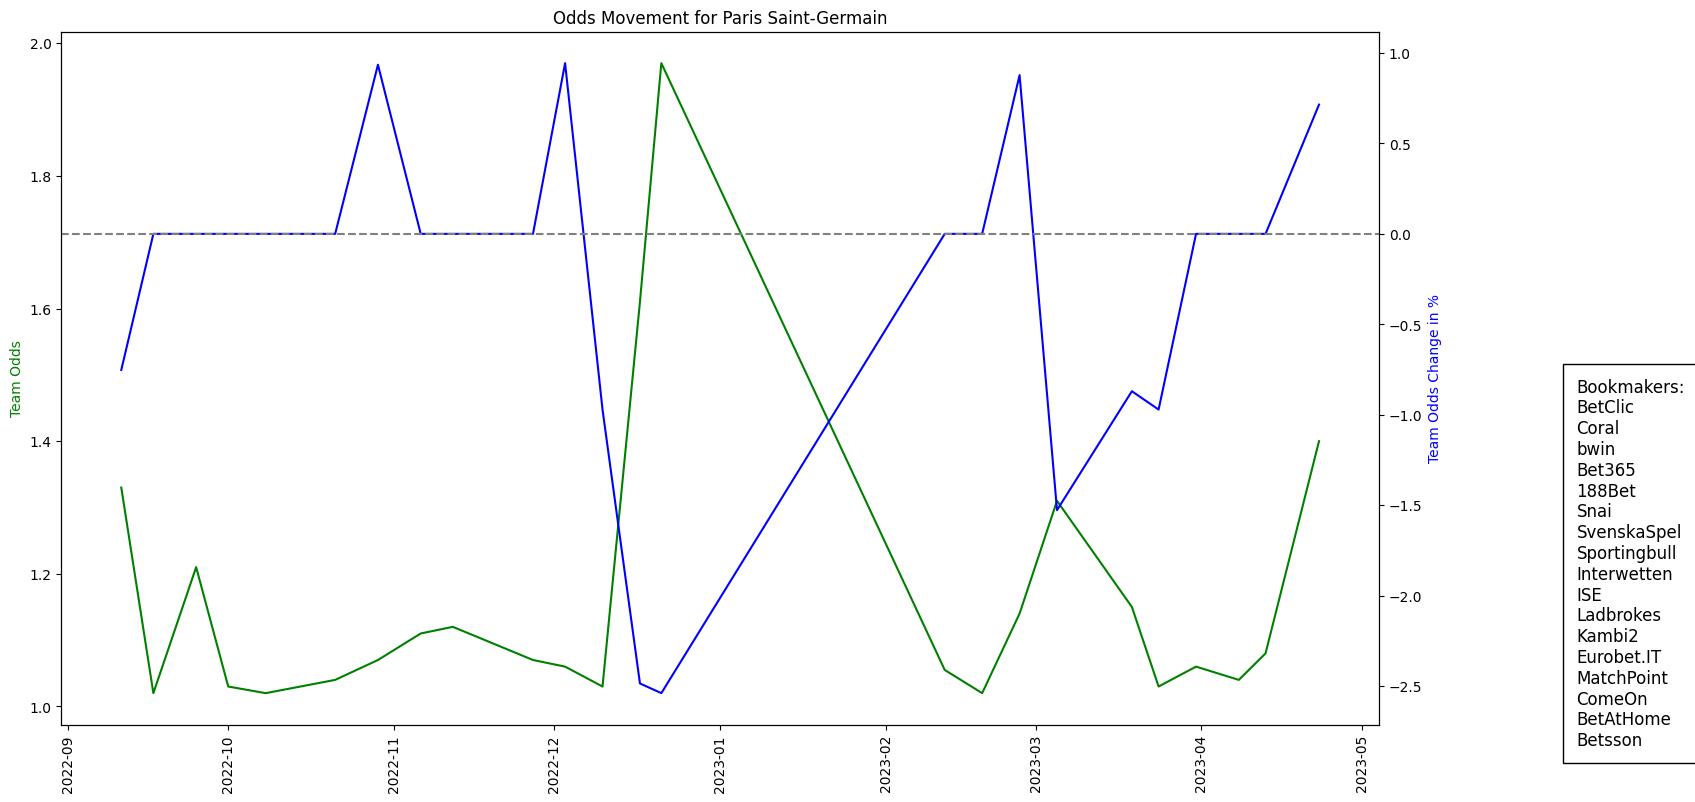

,date,home_team,away_team,bookmaker_name,home_odds,draw_odds,away_odds
97,2022-09-11,USAM Nimes Gard,Paris Saint-Germain,BetClic,4.5 (0.25),11.5 (0.5),1.3 (-0.02)
98,2022-09-11,USAM Nimes Gard,Paris Saint-Germain,Coral,4.0 (0.1),11.0,1.33
99,2022-09-11,USAM Nimes Gard,Paris Saint-Germain,bwin,4.1 (0.1),12.5,1.34 (-0.01)
100,2022-09-11,USAM Nimes Gard,Paris Saint-Germain,Bet365,4.5 (-0.5),9.5 (-0.5),1.37 (0.05)
101,2022-09-11,USAM Nimes Gard,Paris Saint-Germain,188Bet,4.15 (0.1),11.5 (0.5),1.34 (-0.02)
...,...,...,...,...,...,...,...
2670,2023-04-22,Saint Raphael,USAM Nimes Gard,BetAtHome,2.6 (0.05),7.6,1.77 (-0.03)
2671,2023-04-22,Saint Raphael,USAM Nimes Gard,bwin,2.55 (0.25),9.25 (0.25),1.75 (-0.15)
2672,2023-04-22,Saint Raphael,USAM Nimes Gard,Interwetten,2.55 (-0.05),8.0,1.75 (0.02)
2673,2023-04-22,Saint Raphael,USAM Nimes Gard,Ladbrokes,2.5 (0.25),8.5,1.73 (-0.12)


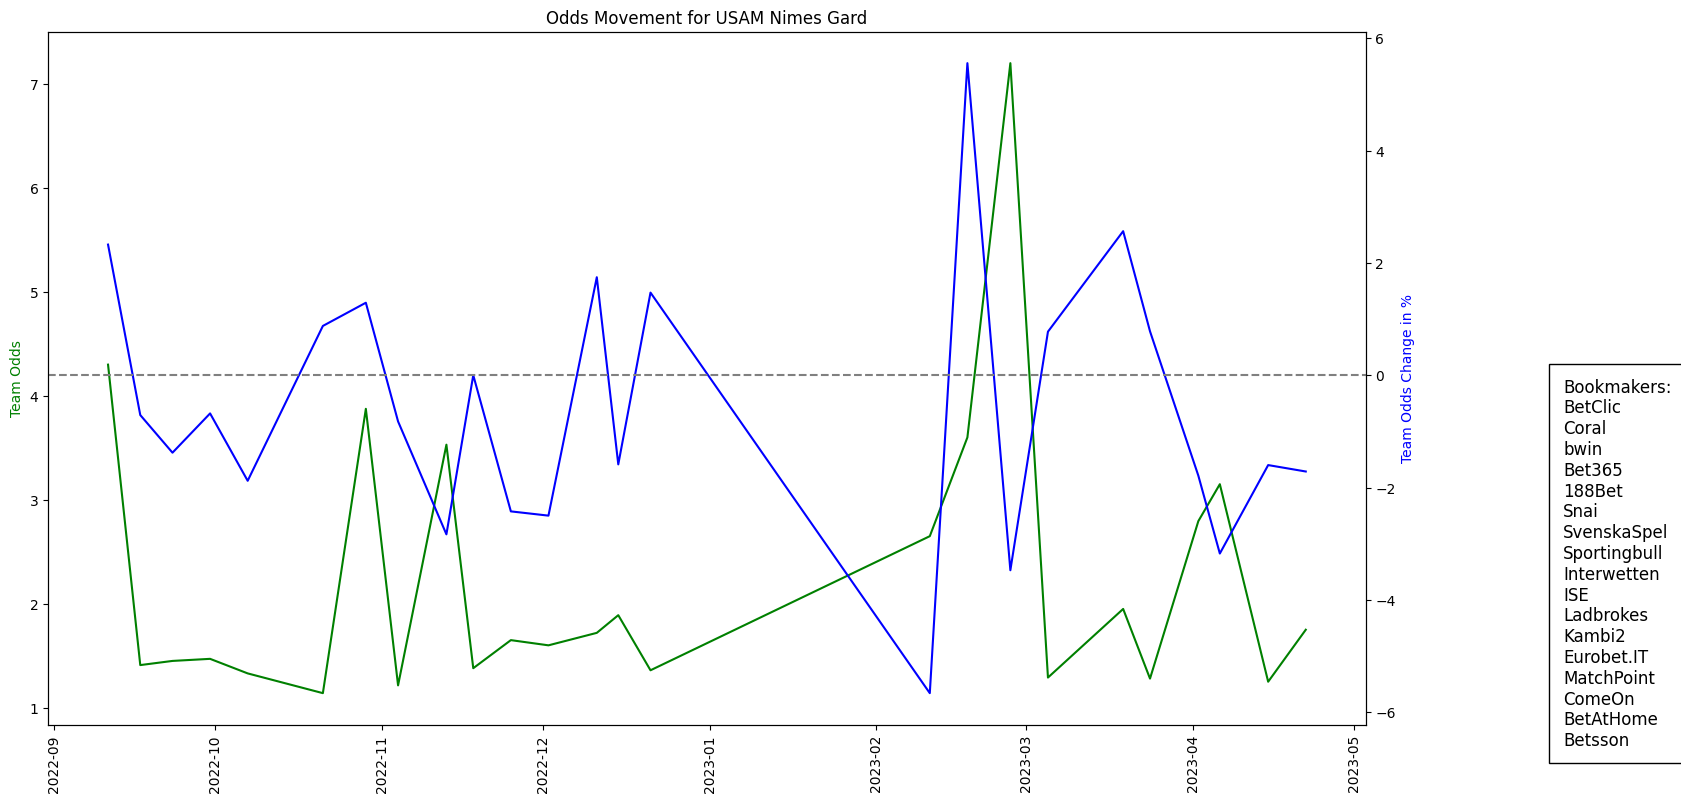

,date,home_team,away_team,bookmaker_name,home_odds,draw_odds,away_odds
55,2022-09-10,Istres Ouest Provence,Montpellier Handball,Interwetten,6.0,14.0 (1.0),1.2
56,2022-09-10,Istres Ouest Provence,Montpellier Handball,bwin,6.75,14.0,1.17
57,2022-09-10,Istres Ouest Provence,Montpellier Handball,Sportingbull,6.25 (0.5),11.0,1.16 (-0.02)
58,2022-09-10,Istres Ouest Provence,Montpellier Handball,SvenskaSpel,5.95,11.8 (-0.2),1.23
59,2022-09-10,Istres Ouest Provence,Montpellier Handball,Snai,5.75 (0.25),12.0 (1.0),1.19
...,...,...,...,...,...,...,...
2685,2023-04-23,Paris Saint-Germain,Montpellier Handball,Betsson,1.38 (-0.03),9.18,3.63 (0.19)
2686,2023-04-23,Paris Saint-Germain,Montpellier Handball,BetClic,1.4 (-0.02),9.5 (-0.5),3.5 (-0.1)
2687,2023-04-23,Paris Saint-Germain,Montpellier Handball,ComeOn,1.43 (-0.02),8.75,3.6 (0.15)
2688,2023-04-23,Paris Saint-Germain,Montpellier Handball,Kambi2,1.42 (0.04),9.5,3.8 (-0.3)


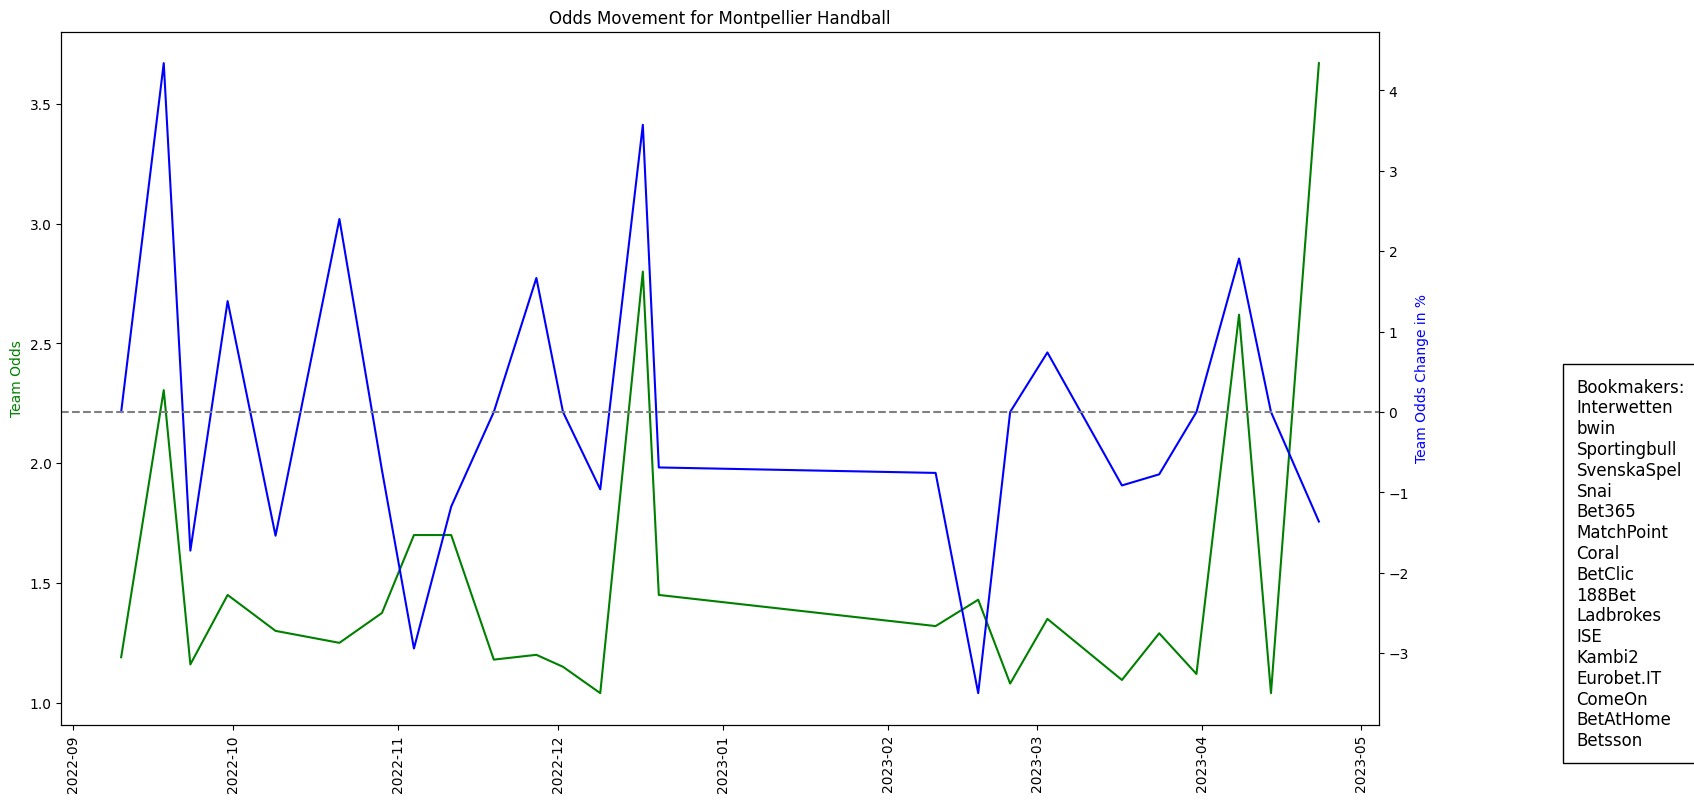

In [ ]:
#@title odds/team 
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
import numpy as np

# Read in data from CSV file
folder_name = json_file_name_widget.value
df = pd.read_csv(f'/content/{folder_name}_odds.csv').fillna(0.00)

# Create dropdown menu to select team
teams = df[['home_team', 'away_team']].stack().unique()
# Define function to update table
def update_table(change):
    team = change.new
    # Filter dataframe to show games where the selected team is either the home or away team
    team_games = df[(df['home_team'] == team) | (df['away_team'] == team)]
    team_data = team_games.copy()

    odds_table = team_games[['date', 'home_team', 'away_team', 'bookmaker_name', 'home_odds', 'draw_odds', 'away_odds', 'home_odds_change', 'draw_odds_change', 'away_odds_change']]
    odds_table = odds_table.dropna() # drop rows with missing values

    # Create a new table with odds and odds changes in same cell for display
    odds_table_D = odds_table[['date', 'home_team', 'away_team', 'bookmaker_name']].copy()
    odds_cols = ['home_odds', 'draw_odds', 'away_odds']
    for col in odds_cols:
        mask = odds_table[col+'_change'] != 0
        odds_table_D[col] = odds_table[col].astype(str)
        odds_table_D.loc[mask, col] = odds_table_D[col].astype(str) + ' (' + odds_table.loc[mask, col+'_change'].astype(str) + ')'


      # Display table
    display(odds_table_D)

    # Calculate median odds for selected team
    if team in team_games['home_team'].unique():
        median_odds = team_games.groupby('match_id')['home_odds'].median()
        team_odds_home = team_games.loc[team_games['home_team'] == team].groupby('match_id')['home_odds'].median()
        team_odds_away = team_games.loc[team_games['away_team'] == team].groupby('match_id')['away_odds'].median()
        team_odds_change_home = team_data.loc[team_data['home_team'] == team].groupby('match_id')['home_odds_change'].median()
        team_odds_change_away = team_data.loc[team_data['away_team'] == team].groupby('match_id')['away_odds_change'].median()
        team_odds = pd.concat([team_odds_home, team_odds_away]).sort_index()
        team_odds_change = pd.concat([team_odds_change_home, team_odds_change_away]).sort_index()
    else:
        median_odds = team_games.groupby('match_id')['away_odds'].median()
        team_odds_away = team_games.loc[team_games['away_team'] == team].groupby('match_id')['away_odds'].median()
        team_odds_home = team_games.loc[team_games['home_team'] == team].groupby('match_id')['home_odds'].median()
        team_odds_change_away = team_data.loc[team_data['away_team'] == team].groupby('match_id')['away_odds_change'].median()
        team_odds_change_home = team_data.loc[team_data['home_team'] == team].groupby('match_id')['home_odds_change'].median()
        team_odds = pd.concat([team_odds_home, team_odds_away]).sort_index()
        team_odds_change = pd.concat([team_odds_change_home, team_odds_change_away]).sort_index()

     # Combine both into one final dataframe with match_id, date, team_odds, team_odds_change
    team_odds_df = pd.DataFrame({'match_id': team_odds.index, 'team_odds': team_odds.values, 'team_odds_change': team_odds_change.values})
    team_odds_df['date'] = team_data.groupby('match_id')['date'].first().values # get the date for each game
    team_odds_df['date'] = pd.to_datetime(team_odds_df['date']) # convert date to datetime format
    team_odds_df['team_odds_change_pct'] = (team_odds_df['team_odds_change'] / team_odds_df['team_odds']) * 100
    # Plot the odds from final df by date, Team_odds on left side of y axis and team_odds_change on right side of y axis, x axis just date
    fig, ax1 = plt.subplots(figsize=(17, 9))
    ax2 = ax1.twinx()
    ax1.plot(team_odds_df['date'], team_odds_df['team_odds'], 'g-')
    ax2.plot(team_odds_df['date'], team_odds_df['team_odds_change_pct'], 'b-')
    ax1.set_ylabel('Team Odds', color='g')
    ax2.set_ylabel('Team Odds Change in %', color='b')
    ax2.axhline(y=0, color='grey', linestyle='--')


    bookmaker_list = odds_table_D['bookmaker_name'].unique().tolist()
    bookmakers_text = "Bookmakers:\n" + "\n".join(bookmaker_list) # separate bookmaker list with newline character
    ax1.text(1.15, -0.03, bookmakers_text, transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', pad=10.0)) # add text box with bookmaker list
        

    # Rotate x-axis labels
    ax1.tick_params(axis='x', rotation=90)
    plt.title(f"Odds Movement for {team}")
    plt.show()
    plt.close()



    
team_dropdown = widgets.Dropdown(options=teams, description='Select Team:')
team_dropdown.observe(update_table, names='value')
display(team_dropdown) 



# 2way odds

In [ ]:
#@title 2way_odds
import json
import os
import csv

folder_name = json_file_name_widget.value
folder_path = f"/content/{folder_name}/match_odds"


# Create a CSV file to write the extracted data
csv_file = open(f"/content/{folder_name}/{folder_name}_match_odds.csv", 'w', newline='')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['match_id', 'bookmaker_name', 'home_odds', 'away_odds', 'home_odds_change', 'away_odds_change'])

# Iterate over each JSON file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as json_file:
            try:
                json_data = json.load(json_file)

                # Check if 'doc' key is present in the JSON data
                if 'doc' in json_data:
                    doc = json_data['doc']

                    # Check if 'data' key is present in the 'doc' data
                    if doc and 'data' in doc[0]:
                        data = doc[0]['data']

                        # Check if '3way' key is present in the 'data'
                        if data and '2way' in data:
                            way2 = data['2way']

                            # Check if 'odds' key is present in the '3way'
                            if way2 and 'odds' in way2:
                                odds_list = way2['odds']

                                # Extract the required information from the JSON
                                for odds in odds_list:
                                    match_id = odds['_mid']
                                    bookmaker_name = odds['bookmaker']['name']
                                    home_odds = odds['home']['odds']
                                    away_odds = odds['away']['odds']
                                    home_odds_change = odds['home']['change'] if 'change' in odds['home'] else None
                                    away_odds_change = odds['away']['change'] if 'change' in odds['away'] else None

                                    # Write the extracted data to the CSV file
                                    csv_writer.writerow([match_id, bookmaker_name, home_odds, away_odds, home_odds_change, away_odds_change])
                                       
                            
        

            except Exception as e:
                print(f"Error processing file '{filename}': {e}")
                continue  # Move on to the next file if error occurs

# Close the CSV file
csv_file.close()

# Load the CSV files into dataframes
match_df_path = f'/content/{folder_name}/match_ids_{folder_name}.csv' 
odds_df_path = f'/content/{folder_name}/{folder_name}_match_odds.csv'               
match_df = pd.read_csv(match_df_path)# Merge the dataframes based on the 'match_id' column
odds_df = pd.read_csv(odds_df_path).fillna(0.00)
merged_df = pd.merge(odds_df, match_df, on='match_id', how='inner')
merged_df.sort_values(by=['date', 'home_team'], inplace=True)

merged_df = pd.merge(odds_df, match_df, on='match_id', how='inner')
# Sort the merged dataframe by 'round_name' and 'date' columns
merged_df.sort_values(by=['match_id', 'date'], inplace=True)
rearranged_df = merged_df[['match_id', 'date', 'home_team', 'away_team', 'bookmaker_name', 'home_odds',
'away_odds', 'home_odds_change', 'away_odds_change', 'comment']]
# Save the sorted merged dataframe to a new CSV file

# Convert the 'date' column to datetime format
rearranged_df['date'] = pd.to_datetime(rearranged_df['date'], format='%d/%m/%y')


# create new columns for % change in odds for home, draw, and away
rearranged_df['home_odds_change_pct'] = rearranged_df['home_odds_change'] / rearranged_df['home_odds']
rearranged_df['away_odds_change_pct'] = rearranged_df['away_odds_change'] / rearranged_df['away_odds']

# Sort the DataFrame by the 'date' column in ascending order

rearranged_df = rearranged_df.sort_values('date')
rearranged_df.to_csv(f'/content/{folder_name}_odds.csv', index=False)

print("CSV files have been created successfully!")

CSV files have been created successfully!


In [ ]:
print(df.columns)


Index(['match_id', 'date', 'home_team', 'away_team', 'bookmaker_name',
       'home_odds', 'draw_odds', 'away_odds', 'home_odds_change',
       'draw_odds_change', 'away_odds_change', 'comment'],
      dtype='object')


In [ ]:
#@title bookie_dev
print("Bookmaker Odds Changes deviating from rest of market.")

import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load the dataset into a DataFrame
df = pd.read_csv(f'/content/{folder_name}_odds.csv').fillna(0.00)

# Define the function to handle button click event
def filter_rows(button):
    # Get the selected home and away odds range from the sliders
    home_odds_range = (home_odds_slider.value[0], home_odds_slider.value[1])
    away_odds_range = (away_odds_slider.value[0], away_odds_slider.value[1])
    
    # Filter the DataFrame based on the slider values
    filtered_df = df[(df['home_odds'] >= home_odds_range[0]) & (df['home_odds'] <= home_odds_range[1]) & (df['away_odds'] >= away_odds_range[0]) & (df['away_odds'] <= away_odds_range[1])]
    
    # Group the data by match_id and calculate the median odds for each match
    match_median_odds = filtered_df.groupby('match_id')[['home_odds_change', 'away_odds_change']].median()

    # Merge the median odds back into the original DataFrame
    df_filtered = pd.merge(filtered_df, match_median_odds, on='match_id', suffixes=('', '_median'))

    # Calculate the difference between each bookmaker's odds and the median odds for that match
    df_filtered['home_odds_change_diff'] = df_filtered['home_odds_change'] - df_filtered['home_odds_change_median']
    df_filtered['away_odds_change_diff'] = df_filtered['away_odds_change'] - df_filtered['away_odds_change_median']

    # Print the result for the first match as an example
    if not df_filtered.empty:
        match_id = df_filtered['match_id'].iloc[0]

        match_data = df_filtered[df_filtered['match_id'] == match_id]
        # Print the filtered DataFrame

        print(match_data[['date', 'home_team', 'away_team', 'bookmaker_name', 'home_odds_change', 'home_odds_change_median', 'home_odds_change_diff', 'away_odds_change', 'away_odds_change_median', 'away_odds_change_diff']])
    else:
        print("No matches found for the selected odds range.")
    
# Create the sliders for home and away odds range
home_odds_slider = widgets.FloatRangeSlider(
    value=[1.01, 20.0],
    min=1.01,
    max=20.0,
    step=0.01,
    description='Home Odds Range:',
    readout_format='.2f',
)

away_odds_slider = widgets.FloatRangeSlider(
    value=[1.01, 20.0],
    min=1.01,
    max=20.0,
    step=0.01,
    description='Away Odds Range:',
    readout_format='.2f',
)



# Create the button to filter rows
filter_button = widgets.Button(description='Filter Rows')

# Register the function to handle button click event
filter_button.on_click(filter_rows)

# Display the sliders and button
display(home_odds_slider)
display(away_odds_slider)
display(filter_button)



Bookmaker Odds Changes deviating from rest of market.


FloatRangeSlider(value=(1.01, 20.0), description='Home Odds Range:', max=20.0, min=1.01, step=0.01)

FloatRangeSlider(value=(1.01, 20.0), description='Away Odds Range:', max=20.0, min=1.01, step=0.01)

Button(description='Filter Rows', style=ButtonStyle())

          date   home_team        away_team bookmaker_name  home_odds_change  \
0   2022-09-09  HBC Nantes  Chambery Savoie     Eurobet.IT             -0.01   
1   2022-09-09  HBC Nantes  Chambery Savoie          Coral              0.00   
2   2022-09-09  HBC Nantes  Chambery Savoie        BetClic              0.00   
3   2022-09-09  HBC Nantes  Chambery Savoie     MatchPoint             -0.02   
4   2022-09-09  HBC Nantes  Chambery Savoie            ISE             -0.01   
5   2022-09-09  HBC Nantes  Chambery Savoie         Bet365             -0.03   
6   2022-09-09  HBC Nantes  Chambery Savoie           Snai             -0.01   
7   2022-09-09  HBC Nantes  Chambery Savoie    SvenskaSpel             -0.01   
8   2022-09-09  HBC Nantes  Chambery Savoie         188Bet             -0.01   
9   2022-09-09  HBC Nantes  Chambery Savoie           bwin              0.00   
10  2022-09-09  HBC Nantes  Chambery Savoie    Interwetten             -0.03   
11  2022-09-09  HBC Nantes  Chambery Sav

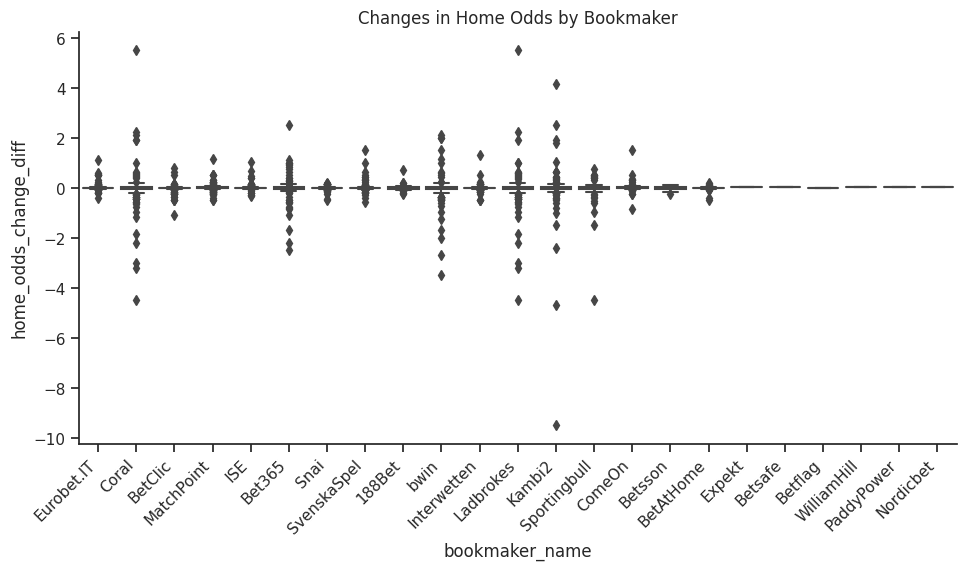

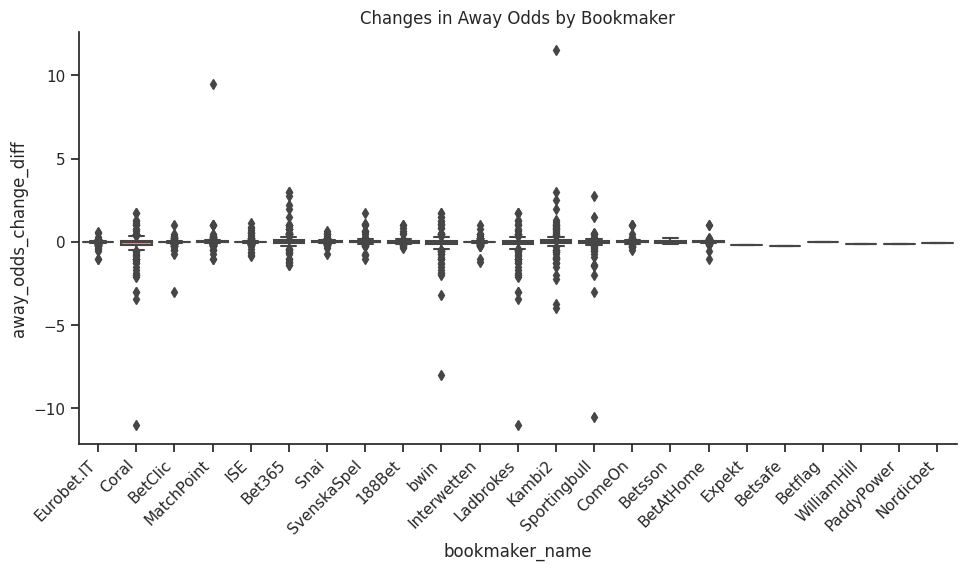

In [ ]:
#@title bookies mov home/away
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv(f'/content/{folder_name}_odds.csv').fillna(0.00)

# Group the data by match_id and calculate the median odds for each match
match_median_odds = df.groupby('match_id')[['home_odds_change', 'away_odds_change']].median()

# Merge the median odds back into the original DataFrame
df = pd.merge(df, match_median_odds, on='match_id', suffixes=('', '_median'))

# Calculate the difference between each bookmaker's odds and the median odds for that match
df['home_odds_change_diff'] = df['home_odds_change'] - df['home_odds_change_median']
df['away_odds_change_diff'] = df['away_odds_change'] - df['away_odds_change_median']

# Create boxplots using seaborn
sns.set(style='ticks')
g = sns.catplot(x='bookmaker_name', y='home_odds_change_diff', data=df, kind='box', height=5, aspect=2)
g.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title('Changes in Home Odds by Bookmaker')
plt.show()

sns.set(style='ticks')
g = sns.catplot(x='bookmaker_name', y='away_odds_change_diff', data=df, kind='box', height=5, aspect=2)
g.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title('Changes in Away Odds by Bookmaker')
plt.show()


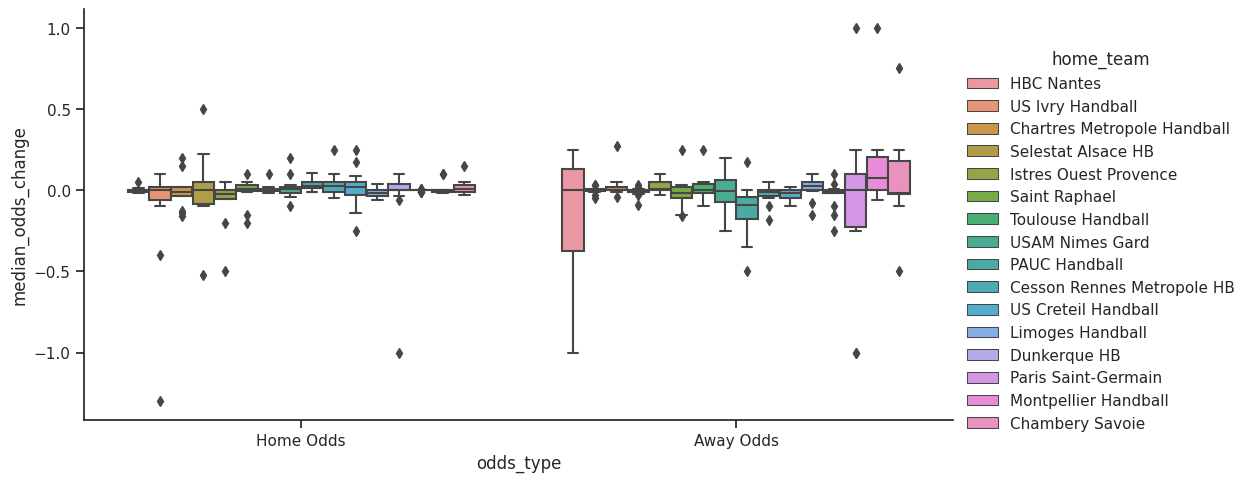

In [ ]:
#@title teams mov /home/away
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data into a DataFrame
df = pd.read_csv(f'/content/{folder_name}_odds.csv').fillna(0.00)


# Create a new DataFrame with home and away team columns and drop duplicates
teams_df = df[['home_team', 'away_team']].drop_duplicates()

# Create empty lists to store median odds changes
home_medians = []
away_medians = []

# Loop through each match and calculate median odds changes for home and away teams
for i, row in teams_df.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    match_data = df[(df['home_team'] == home_team) & (df['away_team'] == away_team)]
    home_medians.append(match_data['home_odds_change'].median())
    away_medians.append(match_data['away_odds_change'].median())

# Add median odds changes to the teams DataFrame
teams_df['home_medians'] = home_medians
teams_df['away_medians'] = away_medians

# Melt the DataFrame to create a long format for visualization
melted_df = pd.melt(teams_df, id_vars=['home_team', 'away_team'], value_vars=['home_medians', 'away_medians'], var_name='odds_type', value_name='median_odds_change')

# Create boxplots using seaborn
sns.set(style='ticks')
g = sns.catplot(x='odds_type', y='median_odds_change', hue='home_team', data=melted_df, kind='box', height=5, aspect=2)
g.set_xticklabels(['Home Odds', 'Away Odds'])
plt.show()


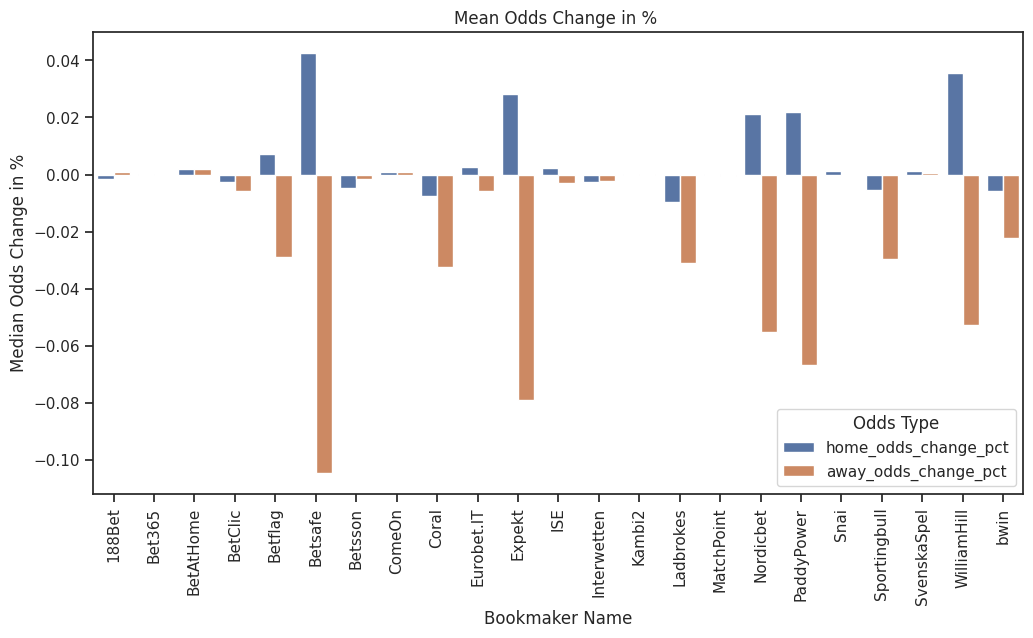

In [ ]:
#@title bookies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv(f'/content/{folder_name}_odds.csv').fillna(0.00)

# Calculate the median odds change for each bookmaker
bookmaker_changes = df.groupby('bookmaker_name').agg({
    'home_odds_change_pct': 'mean',
    'away_odds_change_pct': 'mean',
}).reset_index()

# Melt the DataFrame to transform it into long format
bookmaker_changes = pd.melt(bookmaker_changes, id_vars='bookmaker_name', value_vars=['home_odds_change_pct', 'away_odds_change_pct'], var_name='odds_type', value_name='median_change')

# Create a bar chart to visualize the median odds change for each bookmaker
plt.figure(figsize=(12, 6))
sns.barplot(x='bookmaker_name', y='median_change', hue='odds_type', data=bookmaker_changes)
plt.title('Mean Odds Change in % ')
plt.xlabel('Bookmaker Name')
plt.ylabel('Median Odds Change in %')
plt.xticks(rotation=90)
plt.legend(title='Odds Type')
plt.show()


In [ ]:
#@title bookie dropdown
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import ipywidgets as widgets
from IPython.display import display

# Define the function to handle dropdown selection event
def perform_t_test(change):
    # Get the selected bookmaker name from the dropdown
    selected_bookmaker = change['new']
    
    # Filter the data by bookmaker_name
    bm_data = df[df['bookmaker_name'] == selected_bookmaker]
    # Create a list with bookmakers for the dropdown menu and drop duplicates
    bm_df = df['bookmaker_name'].drop_duplicates().tolist() # convert to list

    # Create the dropdown widget with bookmaker names as options
    bookmaker_options = bm_df
    bookmaker_dropdown = widgets.Dropdown(options=bookmaker_options, description='Select Bookmaker')

    # Register the function to handle dropdown selection event
    bookmaker_dropdown.observe(perform_t_test, names='value')

    # Display the dropdown widget
    display(bookmaker_dropdown)

# Create the dropdown widget with bookmaker names as options
bm_df = df['bookmaker_name'].drop_duplicates().tolist() # convert to list
bookmaker_options = bm_df
bookmaker_dropdown = widgets.Dropdown(options=bookmaker_options, description='Select Bookmaker')

# Register the function to handle dropdown selection event
bookmaker_dropdown.observe(perform_t_test, names='value')

# Display the dropdown widget
display(bookmaker_dropdown)


Dropdown(description='Select Bookmaker', options=('Eurobet.IT', 'Coral', 'BetClic', 'MatchPoint', 'ISE', 'Bet3…

In [ ]:
#@title Dart
import pandas as pd
import json
import os
import csv

folder_name = json_file_name_widget.value
folder_path = f"/content/{folder_name}/match_timeline"

# Iterate over each JSON file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as json_file:
            try:
                json_data = json.load(json_file)

                # extract the relevant events
                home_team = data['doc'][0]['data']['match']['teams']['home']['name']
                away_team = data['doc'][0]['data']['match']['teams']['away']['name']
                dart_throw_events = [event for event in data['doc'][0]['data']['events'] if event['type'] == 'single_throw_dart']

                # extract the relevant data from each event
                rows = []
                for event in dart_throw_events:
                    row = {}
                    for key in ['_doc', '_id', '_typeid', 'type', 'matchid', 'uts' , 'name', 'team', 'points', 'segment', 'event_points', 'double_attempt']:
                        if key in event:
                            row[key] = event[key]
                        else:
                            row[key] = ''
                    if row['team'] == 'home':
                        row['team'] = home_team
                    elif row['team'] == 'away':
                        row['team'] = away_team
                    rows.append(row)

                # create the dataframe
                df = pd.DataFrame(rows)

                # convert 'points' and 'event_points' columns to numeric
                df['points'] = pd.to_numeric(df['points'], errors='coerce')
                df['event_points'] = pd.to_numeric(df['event_points'], errors='coerce')

                # add new column
                df['triple'] = df['points'] / df['event_points']

                # save as CSV file
                csv_file_name = os.path.splitext(filename)[0] + '.csv'
                df.to_csv(os.path.join(folder_path, csv_file_name), index=False)
            except:
                pass


In [ ]:
#@title xlsx
# Read the CSV file
csv_file_path = ('/content/Volleyball_DE1_22_23_f.csv')
df = pd.read_csv(csv_file_path)

# Create XLSX file
xlsx_file_path = f'/content/Volleyball_DE1_22_23_f_odds.xlsx'
df.to_excel(xlsx_file_path)

In [ ]:
#@title _odds.csv l
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Define the function to handle button click event
def process_file(button):
    # Get the file path from the text field
    file_path = file_text.value
    
    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Group by match_id and calculate the average change in home and away team odds
    grouped = df.groupby('match_id').agg({'home_team': 'first',
                                          'away_team': 'first',
                                          'home_odds_change': 'mean',
                                          'away_odds_change': 'mean'}).reset_index()
    
    # Sort by home odds change and print the matches with the biggest average odds change for home team
    print("Matches with Biggest Odds Change for Home Team:")
    print(grouped.sort_values('home_odds_change', ascending=False).head(10).to_string(index=False))
    
    # Sort by away odds change and print the matches with the biggest average odds change for away team
    print("\nMatches with Biggest Odds Change for Away Team:")
    print(grouped.sort_values('away_odds_change', ascending=False).head(10).to_string(index=False))

# Create a text field for entering the file path
file_text = widgets.Text(description='_odds.csv path', layout={'width': '400px'})

# Create a button to process the file
process_button = widgets.Button(description='Process File')
process_button.on_click(process_file)

# Display the text field and button
display(file_text, process_button)

Text(value='', description='_odds.csv path', layout=Layout(width='400px'))

Button(description='Process File', style=ButtonStyle())

Matches with Biggest Odds Change for Home Team:
 match_id                  home_team            away_team  home_odds_change  away_odds_change
 35016307         Selestat Alsace HB Montpellier Handball          1.753636         -0.006364
 35016415 Cesson Rennes Metropole HB           HBC Nantes          0.706923         -0.009231
 35016481 Cesson Rennes Metropole HB  Paris Saint-Germain          0.438462         -0.003077
 35016173        US Creteil Handball      USAM Nimes Gard          0.314286         -0.047143
 35016209           Limoges Handball           HBC Nantes          0.283571         -0.020714
 35016363            USAM Nimes Gard Montpellier Handball          0.272308         -0.056154
 35016205        US Creteil Handball        PAUC Handball          0.236923         -0.036923
 35016393            Chambery Savoie  Paris Saint-Germain          0.213846         -0.026923
 35016259         Selestat Alsace HB      Chambery Savoie          0.200833         -0.013333
 35016155   

In [ ]:
#@title _odds.csv ll Top 25 games with the biggest odds changes:

import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Define the function to handle button click event
def process_file(button):
    # Get the file path from the text field
    file_path = file_text.value
    
    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Sort the games by the absolute sum of odds changes in descending order
    df['total_odds_change'] = abs(df['home_odds_change'].fillna(0) + df['away_odds_change'].fillna(0))
    df_sorted = df.sort_values('total_odds_change', ascending=False)
    
    # Print the top 25 games with the biggest odds changes in table format
    print("Top 25 games with the biggest odds changes:")
    print(df_sorted[['match_id', 'date', 'home_team', 'away_team', 'bookmaker_name', 'home_odds', 'away_odds', 'home_odds_change', 'away_odds_change']].head(25).to_string(index=False))

# Create a text field for entering the file path
file_text = widgets.Text(description='_odds.csv', layout={'width': '400px'})

# Create a button to process the file
process_button = widgets.Button(description='Process File')
process_button.on_click(process_file)

# Display the text field and button
display(file_text, process_button)



Text(value='', description='_odds.csv', layout=Layout(width='400px'))

Button(description='Process File', style=ButtonStyle())

Top 25 games with the biggest odds changes:
 match_id       date             home_team                   away_team bookmaker_name  home_odds  away_odds  home_odds_change  away_odds_change
 35016181 2022-10-21   Paris Saint-Germain            Limoges Handball          Coral       1.07      11.00              0.04            -12.00
 35016181 2022-10-21   Paris Saint-Germain            Limoges Handball      Ladbrokes       1.07      11.00              0.04            -12.00
 35016181 2022-10-21   Paris Saint-Germain            Limoges Handball   Sportingbull       1.05       9.50              0.04            -11.50
 35016149 2022-10-01   Paris Saint-Germain         US Creteil Handball         Kambi2       1.01      21.00             -0.05             10.50
 35016373 2023-02-19    Selestat Alsace HB         Paris Saint-Germain         Kambi2      26.00       1.01            -10.00              0.00
 35016249 2022-11-19  Montpellier Handball            Limoges Handball     MatchPoint       

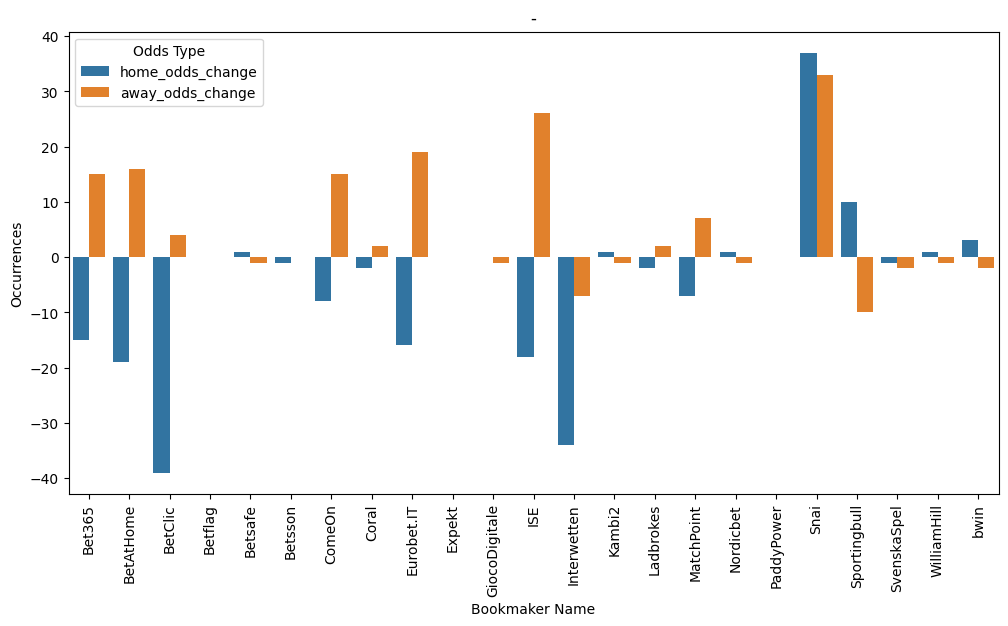

In [ ]:
#@title #movez
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv(f'/content/{folder_name}_odds.csv')

# Calculate the count of positive and negative odds changes for each bookmaker
bookmaker_changes = df.groupby('bookmaker_name').agg({
    'home_odds_change': lambda x: sum(x > 0) - sum(x < 0),
    'away_odds_change': lambda x: sum(x > 0) - sum(x < 0)
}).reset_index()

# Melt the DataFrame to transform it into long format
bookmaker_changes = pd.melt(bookmaker_changes, id_vars='bookmaker_name', value_vars=['home_odds_change', 'away_odds_change'], var_name='odds_type', value_name='occurrences')

# Create a bar chart to visualize the occurrences of odds changes for each bookmaker
plt.figure(figsize=(12, 6))
sns.barplot(x='bookmaker_name', y='occurrences', hue='odds_type', data=bookmaker_changes)
plt.title('-')
plt.xlabel('Bookmaker Name')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)
plt.legend(title='Odds Type')
plt.show()


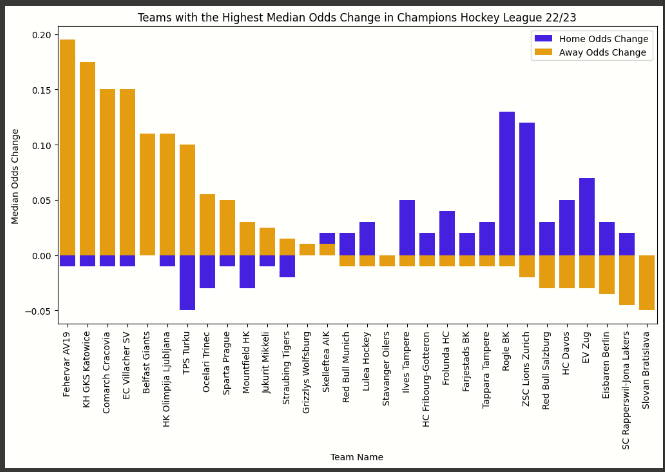 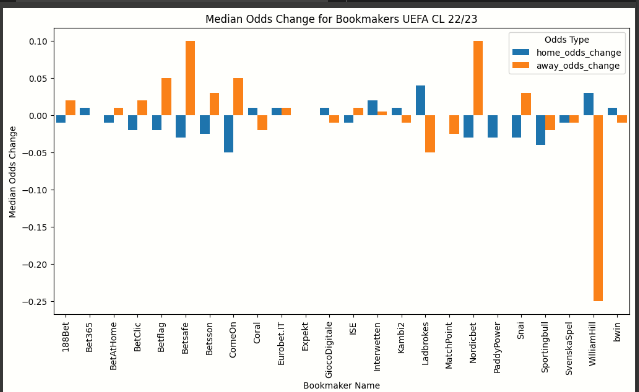

# data  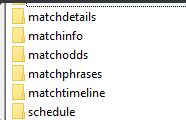

play by play

In [ ]:
!curl "https://widgets.fn.sportradar.com/demolmt/en/Etc:UTC/gismo/match_timeline/39047865" -o match_timeline.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  134k    0  134k    0     0   459k      0 --:--:-- --:--:-- --:--:--  459k


phrases

In [ ]:
!curl "https://widgets.fn.sportradar.com/demolmt/en/Etc:UTC/gismo/match_phrases/34860183"

{"queryUrl":"match_phrases\/34860183","doc":[{"event":"match_phrases","_dob":1681498447,"_maxage":10800,"data":{"match":{"_doc":"match","_id":34860183,"_sid":2,"_seasonid":94679,"_rcid":103,"_tid":153,"_utid":138,"_dt":{"_doc":"time","time":"18:30","date":"14\/10\/22","tz":"UTC","tzoffset":0,"uts":1665772200},"round":2,"roundname":{"_doc":"tableround","_id":2,"name":2},"week":41,"coverage":{"lineup":2,"formations":0,"livetable":0,"injuries":0,"ballspotting":false,"cornersonly":true,"multicast":false,"scoutmatch":1,"scoutcoveragestatus":0,"scoutconnected":true,"liveodds":true,"deepercoverage":false,"tacticallineup":false,"basiclineup":true,"hasstats":true,"inlivescore":true,"advantage":null,"tiebreak":null,"paperscorecard":null,"penaltyshootout":2,"scouttest":false,"lmtsupport":3,"venue":false,"matchdatacomplete":false,"mediacoverage":false,"substitutions":false},"result":{"home":103,"away":96,"winner":"home"},"periods":{"p1":{"home":14,"away":23},"p2":{"home":32,"away":19},"p3":{"home"

details

In [ ]:
!curl "https://widgets.fn.sportradar.com/demolmt/en/Etc:UTC/gismo/match_details/34860183"

info

In [ ]:
!curl "https://widgets.fn.sportradar.com/demolmt/en/Etc:UTC/gismo/match_info/34860183"

{"queryUrl":"match_info\/34860183","doc":[{"event":"match_info","_dob":1681488136,"_maxage":10800,"data":{"_doc":"match_info","match":{"_doc":"match","_id":34860183,"_sid":2,"_seasonid":94679,"_rcid":103,"_tid":153,"_utid":138,"_dt":{"_doc":"time","time":"18:30","date":"14\/10\/22","tz":"UTC","tzoffset":0,"uts":1665772200},"round":2,"roundname":{"_doc":"tableround","_id":2,"name":2},"week":41,"coverage":{"lineup":2,"formations":0,"livetable":0,"injuries":0,"ballspotting":false,"cornersonly":true,"multicast":false,"scoutmatch":1,"scoutcoveragestatus":0,"scoutconnected":true,"liveodds":true,"deepercoverage":false,"tacticallineup":false,"basiclineup":true,"hasstats":true,"inlivescore":true,"advantage":null,"tiebreak":null,"paperscorecard":null,"penaltyshootout":2,"scouttest":false,"lmtsupport":3,"venue":false,"matchdatacomplete":false,"mediacoverage":false,"substitutions":false},"result":{"home":103,"away":96,"winner":"home"},"periods":{"p1":{"home":14,"away":23},"p2":{"home":32,"away":19

In [ ]:
!curl "https://widgets.fn.sportradar.com/demolmt/en/Etc:UTC/gismo/match_details/34860183" -o 34860183.json

#@title read keys
import json

def print_key_value(data, keys, indent=0):
    """Recursively prints the values of specified keys."""
    for key, value in data.items():
        if key in keys:
            print('  ' * indent + f'- {key}: {value}')
        if isinstance(value, dict):
            print_key_value(value, keys, indent + 1)

# Specify the keys to retrieve values for
keys_to_retrieve = ['queryUrl', 'doc']

# Load the match_odds.json file
with open('34860183.json', 'r') as f:
    match_odds_data = json.load(f)

# Print the values of specified keys
print_key_value(match_odds_data, keys_to_retrieve)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1661  100  1661    0     0   3315      0 --:--:-- --:--:-- --:--:--  3308
- queryUrl: match_details/34860183
- doc: [{'event': 'match_details', '_dob': 1681498948, '_maxage': 60, 'data': {'_doc': 'details', '_matchid': 34860183, 'teams': {'home': 'Vitoria-Gasteiz', 'away': 'Partizan Belgrade'}, 'index': [110, 1065, 'twopointers', 'threepointers', 134, 1098, 1067, 'successattempts', 129, 1182, 1619, 1654, 1661, 1714], 'values': {'110': {'name': 'Ball possession', 'value': {'home': 46, 'away': 54}}, '129': {'name': 'Total Fouls', 'value': {'home': 32, 'away': 25}}, '134': {'name': 'Max Points in a Row', 'value': {'home': 8, 'away': 6}}, '1065': {'name': 'Free throws scored', 'value': {'home': '20/7/27', 'away': '27/4/31'}}, 'successattempts': {'name': 'Successful Attempts', 'value': {'home': 53, 'away': 58}}, 'twopointers': {'n

In [ ]:
import json

# Load the JSON data
file_path = "/content/Snooker_WM/match_timeline/40481299.json"
with open(file_path, 'r') as file:
    json_data = json.load(file)

# Pretty-print the JSON data
print(json.dumps(json_data, indent=4))
